# Tugas 3

## Bisnis Understanding

Warung bakso merupakan salah satu usaha makanan yang memiliki potensi besar di Indonesia, mengingat bakso adalah makanan yang digemari hampir seluruh kalangan masyarakat. Data yang saya gunakan untuk analisis berasal dari Kaggle, berupa dataset penjualan harian di sebuah warung bakso. Analisis terhadap data ini bertujuan untuk memberikan wawasan yang lebih baik kepada pemilik warung mengenai pola penjualan, performa kategori produk, dan faktor-faktor lain yang memengaruhi pendapatan.

## Tujuan

tujuan dari forecasting harga penjualan frozen food adalah mengindentifikasi tren penjualan dengan cara memahami pola penjualan yang berubah sesuai dengan strategi bisnis yang tepat dan memprediksi pendapatan untuk beberapa hari kedepan sehingga kita dapat lebih siap dalam mengelola stok.

# Data Understanding

## Pengambilan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [2]:
import pandas as pd

# Memuat data dari file CSV
file_path = '/content/data penjualan.csv'

# Membaca file dengan delimiter ';'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom yang seluruhnya kosong
data = data.dropna(axis=1, how='all')

# Membersihkan nama kolom dengan menghapus spasi ekstra
data.columns = data.columns.str.strip()

print(data.head())

     Outlet Receipt Number        Date      Time           Category  \
0  Outlet 1         3BO6C4  09/05/2023  20:11:21      Bakso Rebusan   
1  Outlet 1         3BO6C4  09/05/2023  20:11:21      Bakso Rebusan   
2  Outlet 1         3BO6C4  09/05/2023  20:11:21      Bakso Rebusan   
3  Outlet 1         3BO6C4  09/05/2023  20:11:21        Bakso Paket   
4  Outlet 1         3BO6C3  09/05/2023  19:31:30  Chicken Rice Bowl   

       Brand              Items    SKU  Quantity  Gross Sales  Net Sales  \
0  Unbranded           Gorengan  Gor01         1       1500.0     1500.0   
1  Unbranded             Siomay   BR05         2       5000.0     5000.0   
2  Unbranded      Bakso Rebusan   BR01         2       7000.0     7000.0   
3  Unbranded  Bakso Balung Babi    B01         1      20000.0    20000.0   
4  Unbranded        Ayam Kremes   RB08         1      18000.0    18000.0   

  Sales Type        Collected By Payment Method Event Type  
0    Dine In  Kaja Kangin Warung           Cash    Paym

## Informasi Data

In [3]:
# Memeriksa informasi umum tentang data
print(data.info())

# Memeriksa nilai yang hilang (missing values)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Outlet          2412 non-null   object 
 1   Receipt Number  2412 non-null   object 
 2   Date            2412 non-null   object 
 3   Time            2412 non-null   object 
 4   Category        2412 non-null   object 
 5   Brand           2412 non-null   object 
 6   Items           2412 non-null   object 
 7   SKU             2367 non-null   object 
 8   Quantity        2412 non-null   int64  
 9   Gross Sales     2412 non-null   float64
 10  Net Sales       2412 non-null   float64
 11  Sales Type      2412 non-null   object 
 12  Collected By    2412 non-null   object 
 13  Payment Method  2412 non-null   object 
 14  Event Type      2412 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 282.8+ KB
None
Outlet             0
Receipt Number     0
Date            

In [4]:
data.describe()

,Quantity,Gross Sales,Net Sales
count,2412.000000,2412.000000,2412.000000
mean,1.703566,14681.426202,14680.679934
std,1.420512,14910.903205,14910.782089
min,1.000000,1000.000000,1000.000000
25%,1.000000,5000.000000,5000.000000
50%,1.000000,10000.000000,10000.000000
75%,2.000000,18000.000000,18000.000000
max,18.000000,220000.000000,220000.000000


In [5]:
data

,Outlet,Receipt Number,Date,Time,Category,Brand,Items,SKU,Quantity,Gross Sales,Net Sales,Sales Type,Collected By,Payment Method,Event Type
0,Outlet 1,3BO6C4,09/05/2023,20:11:21,Bakso Rebusan,Unbranded,Gorengan,Gor01,1,1500.0,1500.0,Dine In,Kaja Kangin Warung,Cash,Payment
1,Outlet 1,3BO6C4,09/05/2023,20:11:21,Bakso Rebusan,Unbranded,Siomay,BR05,2,5000.0,5000.0,Dine In,Kaja Kangin Warung,Cash,Payment
2,Outlet 1,3BO6C4,09/05/2023,20:11:21,Bakso Rebusan,Unbranded,Bakso Rebusan,BR01,2,7000.0,7000.0,Dine In,Kaja Kangin Warung,Cash,Payment
3,Outlet 1,3BO6C4,09/05/2023,20:11:21,Bakso Paket,Unbranded,Bakso Balung Babi,B01,1,20000.0,20000.0,Dine In,Kaja Kangin Warung,Cash,Payment
4,Outlet 1,3BO6C3,09/05/2023,19:31:30,Chicken Rice Bowl,Unbranded,Ayam Kremes,RB08,1,18000.0,18000.0,Dine In,Kaja Kangin Warung,Cash,Payment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,Outlet 1,3BO5LK,01/01/2023,13:22:59,Chicken Rice Bowl,Unbranded,Chicken Spicy Honey,RB05,2,36000.0,36000.0,Dine In,Kaja Kangin Warung,Cash,Payment
2408,Outlet 1,3BO5LK,01/01/2023,13:22:59,Uncategorized,Unbranded,Mangkuk plastik,Mangkuk1,1,2000.0,2000.0,Dine In,Kaja Kangin Warung,Cash,Payment
2409,Outlet 1,3BO5LJ,01/01/2023,13:19:39,Bakso Paket,Unbranded,Bakso Hemat,BP03,2,20000.0,20000.0,Dine In,Kaja Kangin Warung,Cash,Payment
2410,Outlet 1,3BO5LI,01/01/2023,11:40:25,Bakso Paket,Unbranded,Bakso Balung Babi,B01,3,60000.0,60000.0,Dine In,Kaja Kangin Warung,Cash,Payment


## Plotting Data

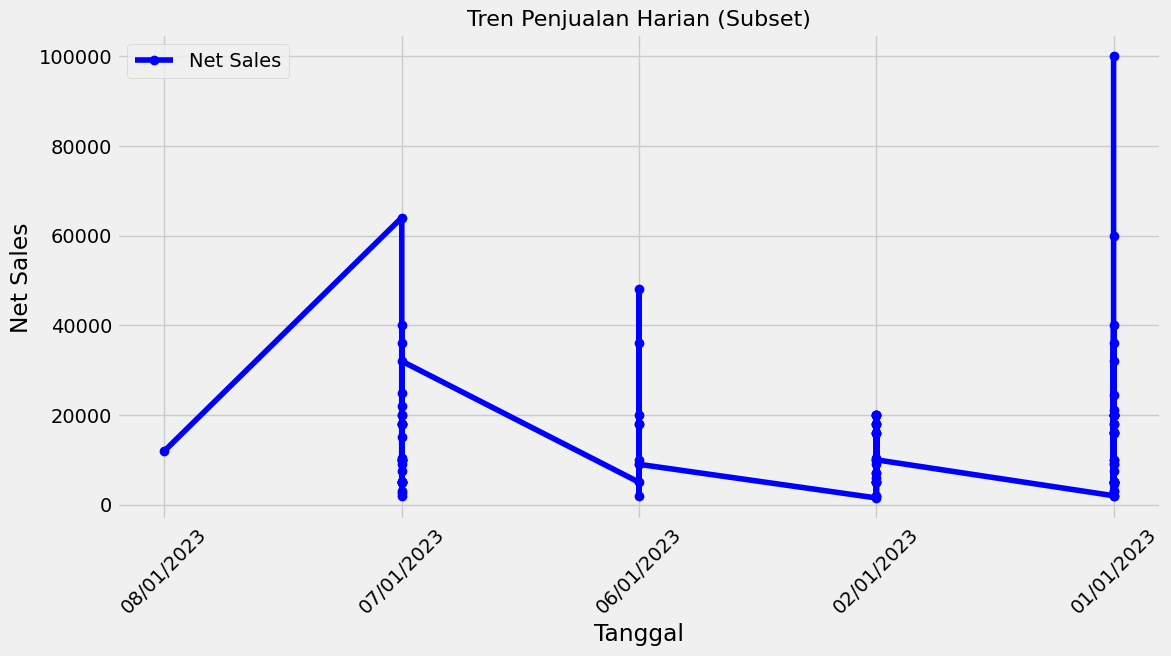

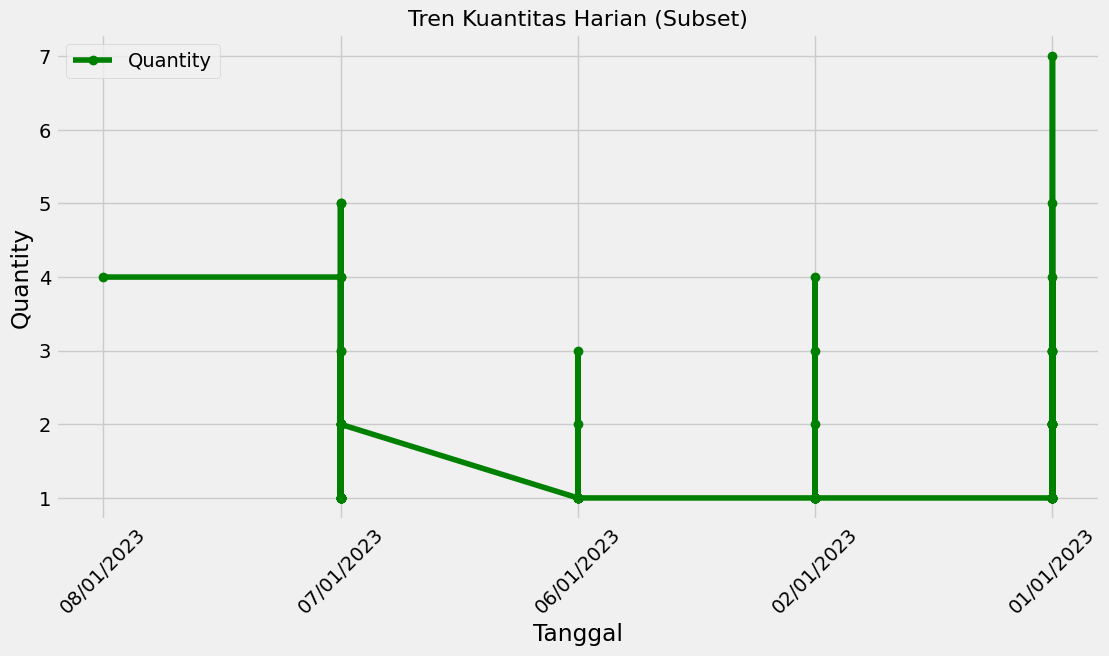

In [6]:
# Menentukan subset data (misalnya, hanya 100 data terakhir)
subset_data = data[-100:]  # Ambil 100 data terakhir

# Plot Net Sales vs. Date untuk subset data
plt.figure(figsize=(12, 6))
plt.plot(subset_data['Date'], subset_data['Net Sales'], marker='o', linestyle='-', color='blue', label='Net Sales')
plt.title('Tren Penjualan Harian (Subset)', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Net Sales')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Membuat label tanggal miring
plt.show()

# Plot Quantity vs. Date untuk subset data
plt.figure(figsize=(12, 6))
plt.plot(subset_data['Date'], subset_data['Quantity'], marker='o', linestyle='-', color='green', label='Quantity')
plt.title('Tren Kuantitas Harian (Subset)', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Quantity')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Membuat label tanggal miring
plt.show()

## Sliding Window

<ipython-input-7-57a33eca6c0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Net Sales Rolling'] = subset_data['Net Sales'].rolling(window=7).mean()


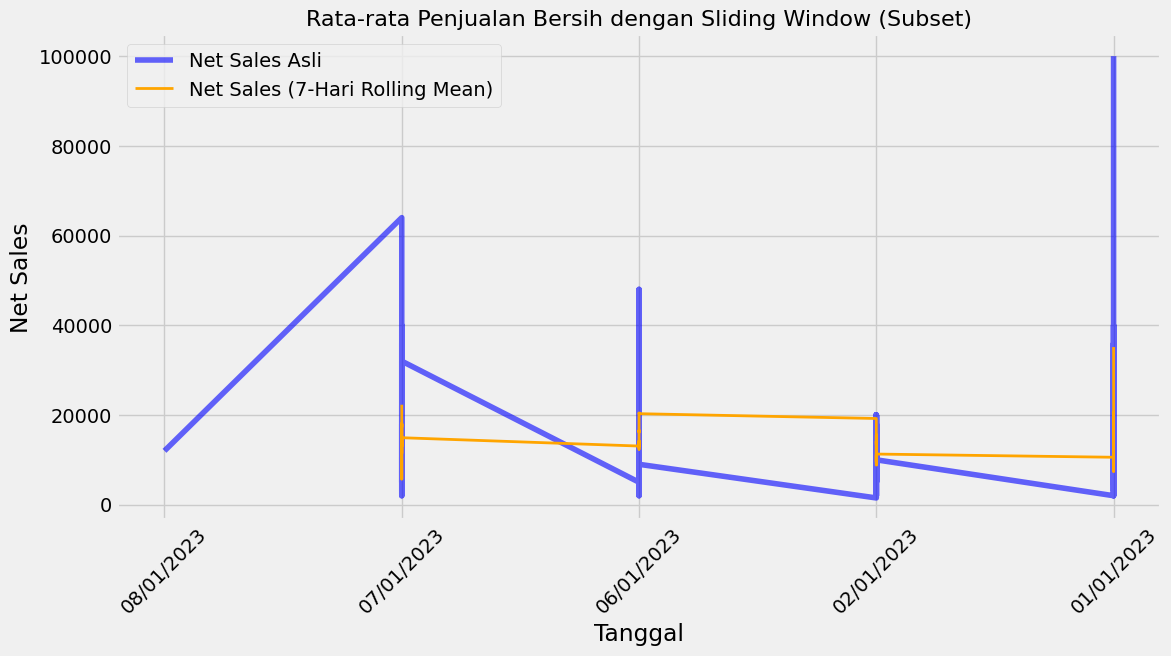

In [7]:
# Membatasi grafik sliding window hanya pada subset data
subset_data['Net Sales Rolling'] = subset_data['Net Sales'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(subset_data['Date'], subset_data['Net Sales'], label='Net Sales Asli', alpha=0.6, color='blue')
plt.plot(subset_data['Date'], subset_data['Net Sales Rolling'], label='Net Sales (7-Hari Rolling Mean)', color='orange', linewidth=2)
plt.title('Rata-rata Penjualan Bersih dengan Sliding Window (Subset)', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Net Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Membuat label tanggal miring
plt.show()

# Eksplorasi Data Analisis(EDA)

## Deteksi Outlier

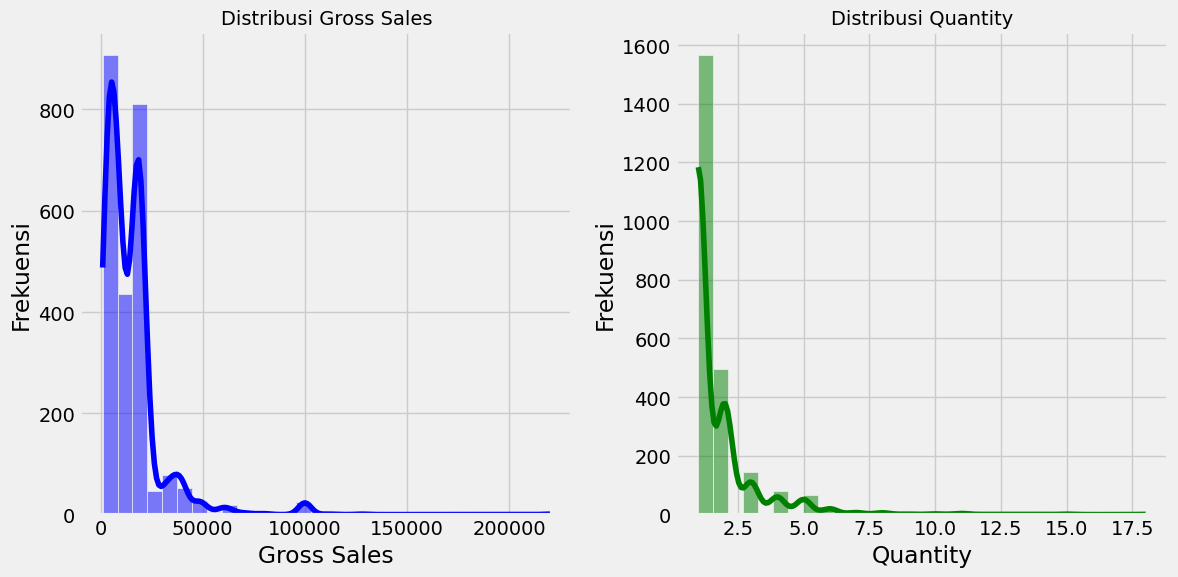

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik distribusi untuk 'Gross Sales'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Gross Sales'], kde=True, color='blue', bins=30)
plt.title('Distribusi Gross Sales', fontsize=14)
plt.xlabel('Gross Sales')
plt.ylabel('Frekuensi')

# Grafik distribusi untuk 'Quantity'
plt.subplot(1, 2, 2)
sns.histplot(data['Quantity'], kde=True, color='green', bins=30)
plt.title('Distribusi Quantity', fontsize=14)
plt.xlabel('Quantity')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np

# Fungsi untuk menghitung batas IQR
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Cek outlier untuk Gross Sales
lower_gross, upper_gross = detect_outliers_iqr(data, 'Gross Sales')

# Cek outlier untuk Quantity
lower_quantity, upper_quantity = detect_outliers_iqr(data, 'Quantity')

print(f"Batas Gross Sales: {lower_gross:.2f} hingga {upper_gross:.2f}")
print(f"Batas Quantity: {lower_quantity:.2f} hingga {upper_quantity:.2f}")

Batas Gross Sales: -14500.00 hingga 37500.00
Batas Quantity: -0.50 hingga 3.50


### Visualisasi Outlier

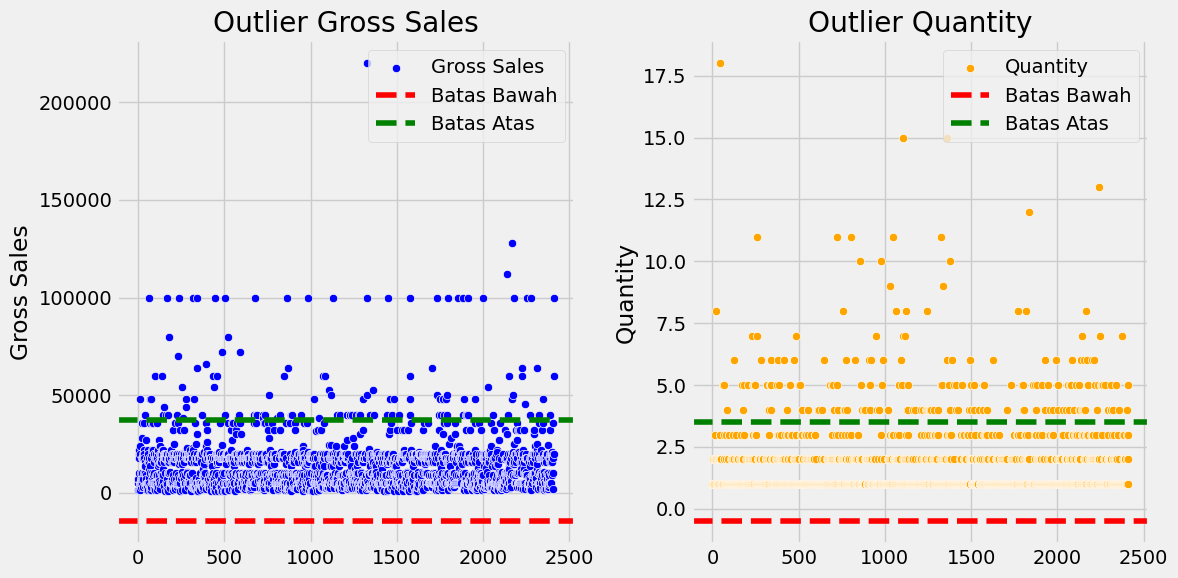

In [10]:
# Visualisasi scatter plot dengan outlier
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=range(len(data)), y=data['Gross Sales'], color='blue', label='Gross Sales')
plt.axhline(lower_gross, color='red', linestyle='--', label='Batas Bawah')
plt.axhline(upper_gross, color='green', linestyle='--', label='Batas Atas')
plt.title('Outlier Gross Sales')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=range(len(data)), y=data['Quantity'], color='orange', label='Quantity')
plt.axhline(lower_quantity, color='red', linestyle='--', label='Batas Bawah')
plt.axhline(upper_quantity, color='green', linestyle='--', label='Batas Atas')
plt.title('Outlier Quantity')
plt.legend()

plt.tight_layout()
plt.show()

### Bersihkan Outlier

In [11]:
# Menghapus data outlier
data_cleaned = data[
    (data['Gross Sales'] >= lower_gross) & (data['Gross Sales'] <= upper_gross) &
    (data['Quantity'] >= lower_quantity) & (data['Quantity'] <= upper_quantity)
]

print(f"Jumlah data sebelum pembersihan: {len(data)}")
print(f"Jumlah data setelah pembersihan: {len(data_cleaned)}")

Jumlah data sebelum pembersihan: 2412
Jumlah data setelah pembersihan: 2120


### Visualisasi Setelah Pembersihan Outlier

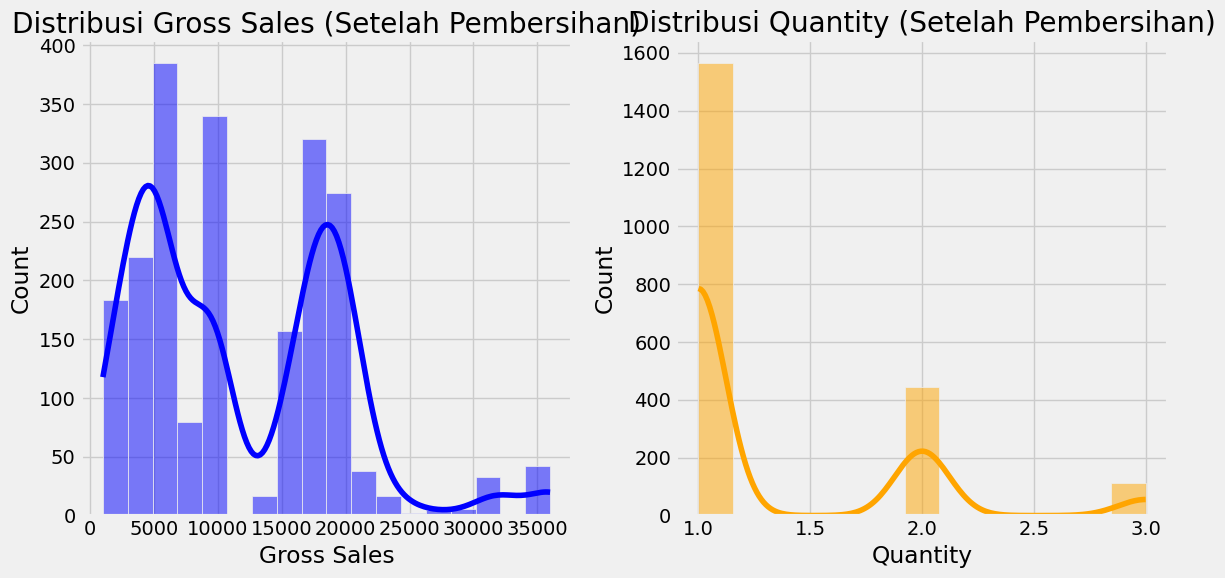

In [12]:
# Visualisasi ulang setelah pembersihan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Gross Sales'], kde=True, color='blue')
plt.title('Distribusi Gross Sales (Setelah Pembersihan)')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Quantity'], kde=True, color='orange')
plt.title('Distribusi Quantity (Setelah Pembersihan)')

plt.tight_layout()
plt.show()

# Preprocessing Data

## Cek Nilai Hilang

In [13]:
# Cek nilai hilang
print(data_cleaned.isnull().sum())

# Isi nilai hilang dengan mean
data_cleaned['Net Sales'].fillna(data_cleaned['Net Sales'].mean(), inplace=True)
data_cleaned['Quantity'].fillna(data_cleaned['Quantity'].median(), inplace=True)

Outlet             0
Receipt Number     0
Date               0
Time               0
Category           0
Brand              0
Items              0
SKU               45
Quantity           0
Gross Sales        0
Net Sales          0
Sales Type         0
Collected By       0
Payment Method     0
Event Type         0
dtype: int64


<ipython-input-13-a0beae175e0a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Net Sales'].fillna(data_cleaned['Net Sales'].mean(), inplace=True)
<ipython-input-13-a0beae175e0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Net Sales'].fillna(data_cleaned['Net Sales'].mean(), inplace=True)
<ipython-input-13-a0b

## Normalisasi

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom numerik untuk normalisasi
numeric_columns = ['Gross Sales', 'Net Sales', 'Quantity']
scaler = MinMaxScaler()

# Normalisasi data numerik
data_normalized = data.copy()
data_normalized[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Menampilkan data setelah normalisasi
print(data_normalized.head())

     Outlet Receipt Number        Date      Time           Category  \
0  Outlet 1         3BO6C4  09/05/2023  20:11:21      Bakso Rebusan   
1  Outlet 1         3BO6C4  09/05/2023  20:11:21      Bakso Rebusan   
2  Outlet 1         3BO6C4  09/05/2023  20:11:21      Bakso Rebusan   
3  Outlet 1         3BO6C4  09/05/2023  20:11:21        Bakso Paket   
4  Outlet 1         3BO6C3  09/05/2023  19:31:30  Chicken Rice Bowl   

       Brand              Items    SKU  Quantity  Gross Sales  Net Sales  \
0  Unbranded           Gorengan  Gor01  0.000000     0.002283   0.002283   
1  Unbranded             Siomay   BR05  0.058824     0.018265   0.018265   
2  Unbranded      Bakso Rebusan   BR01  0.058824     0.027397   0.027397   
3  Unbranded  Bakso Balung Babi    B01  0.000000     0.086758   0.086758   
4  Unbranded        Ayam Kremes   RB08  0.000000     0.077626   0.077626   

  Sales Type        Collected By Payment Method Event Type  
0    Dine In  Kaja Kangin Warung           Cash    Paym

## Visualisasi Data

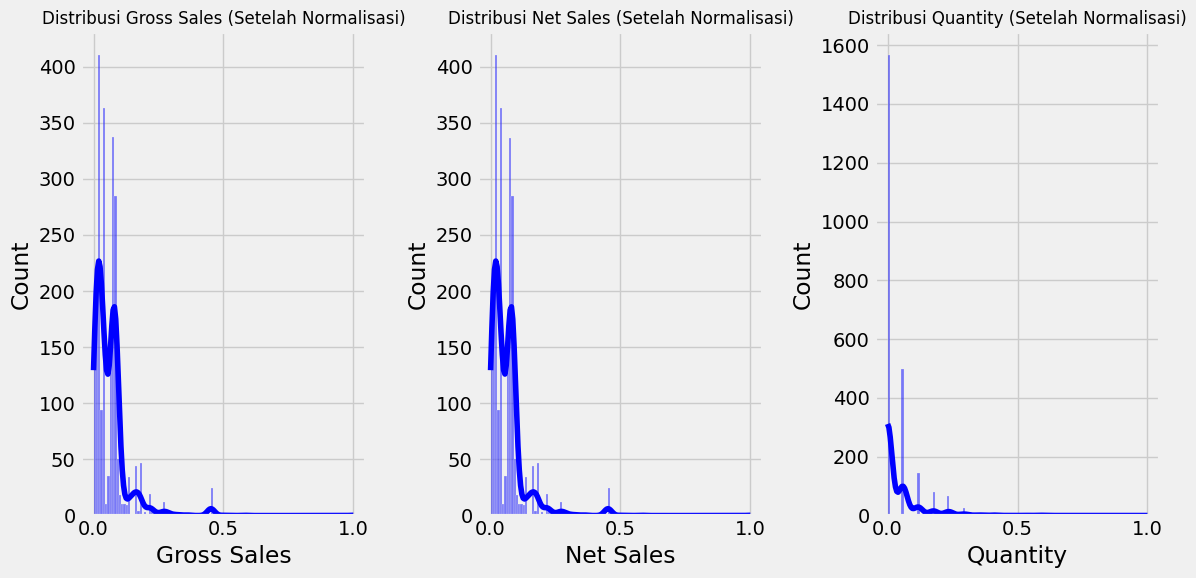

In [15]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.histplot(data_normalized[col], kde=True, color='blue')
    plt.title(f'Distribusi {col} (Setelah Normalisasi)', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## Sliding Window Multi-Step

In [16]:
import numpy as np

# Parameter Sliding Window
look_back = 7  # Jumlah data sebelumnya (lag) untuk prediksi
forecast_steps = 3  # Jumlah langkah ke depan yang akan diprediksi

# Fungsi untuk membuat dataset sliding window
def create_multivariate_dataset(data, target_column, look_back, forecast_steps):
    X, y = [], []
    for i in range(len(data) - look_back - forecast_steps + 1):
        X.append(data.iloc[i:i + look_back].values)
        y.append(data.iloc[i + look_back:i + look_back + forecast_steps][target_column].values)
    return np.array(X), np.array(y)

# Membuat dataset sliding window untuk fitur target 'Net Sales'
X, y = create_multivariate_dataset(data_normalized[numeric_columns], 'Net Sales', look_back, forecast_steps)

print(f'Shape X: {X.shape}, Shape y: {y.shape}')

Shape X: (2403, 7, 3), Shape y: (2403, 3)


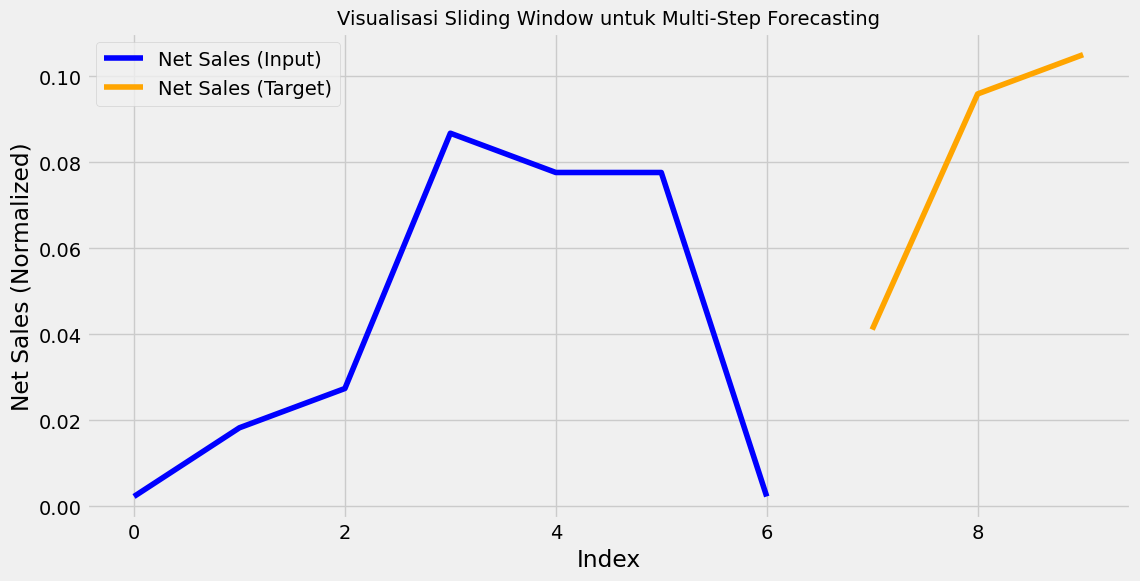

In [17]:
# Contoh visualisasi sample pertama dari X dan y
plt.figure(figsize=(12, 6))

plt.plot(range(look_back), X[0][:, 1], label='Net Sales (Input)', color='blue')
plt.plot(range(look_back, look_back + forecast_steps), y[0], label='Net Sales (Target)', color='orange')
plt.title('Visualisasi Sliding Window untuk Multi-Step Forecasting', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Net Sales (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# Latih Data

In [18]:
# Tentukan jumlah langkah prediksi yang diinginkan (misalnya 3 langkah ke depan)
forecast_steps = 3

# Membagi data ke dalam beberapa rasio (80:20, 70:30, 60:40)
split_ratios = {'80:20': 0.8, '70:30': 0.7, '60:40': 0.6}
datasets = {}

for ratio_name, ratio in split_ratios.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42, shuffle=True)
    datasets[ratio_name] = (X_train, X_test, y_train, y_test)

print("Dataset telah dibagi dengan rasio: 80:20, 70:30, dan 60:40.")
datasets

Dataset telah dibagi dengan rasio: 80:20, 70:30, dan 60:40.


{'80:20': (array([[[0.02283105, 0.02283105, 0.17647059],
          [0.01826484, 0.01826484, 0.        ],
          [0.08675799, 0.08675799, 0.        ],
          ...,
          [0.07762557, 0.07762557, 0.        ],
          [0.07762557, 0.07762557, 0.        ],
          [0.01598174, 0.01598174, 0.        ]],
  
         [[0.01598174, 0.01598174, 0.11764706],
          [0.07762557, 0.07762557, 0.        ],
          [0.03652968, 0.03652968, 0.        ],
          ...,
          [0.06849315, 0.06849315, 0.        ],
          [0.45205479, 0.45205479, 0.23529412],
          [0.17808219, 0.17808219, 0.05882353]],
  
         [[0.06849315, 0.06849315, 0.        ],
          [0.14155251, 0.14155251, 0.05882353],
          [0.08675799, 0.08675799, 0.        ],
          ...,
          [0.08675799, 0.08675799, 0.        ],
          [0.07762557, 0.07762557, 0.        ],
          [0.10958904, 0.10958904, 0.23529412]],
  
         ...,
  
         [[0.08675799, 0.08675799, 0.17647059],
     

# Modelling

## Gradient Boosting Regressor

### Nilai MSE dan RMSE

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import math

# Simpan hasil MSE dan RMSE untuk setiap langkah
results = {}

# Iterasi untuk setiap langkah prediksi
for step in range(forecast_steps):
    print(f"Melatih model untuk langkah ke-{step + 1}...")
    results[step + 1] = {}

    # Iterasi untuk setiap perbandingan data
    for ratio_name, (X_train, X_test, y_train, y_test) in datasets.items():
        # Target untuk langkah ke-(step + 1)
        y_train_step = y_train[:, step]
        y_test_step = y_test[:, step]

        # Model Gradient Boosting
        model = GradientBoostingRegressor(random_state=42)
        model.fit(X_train.reshape(X_train.shape[0], -1), y_train_step)

        # Prediksi
        y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

        # Evaluasi MSE dan RMSE
        mse = mean_squared_error(y_test_step, y_pred)
        rmse = math.sqrt(mse)
        results[step + 1][ratio_name] = {'MSE': mse, 'RMSE': rmse}

# Menampilkan hasil
for step, step_results in results.items():
    print(f"\nLangkah ke-{step}:")
    for ratio_name, metrics in step_results.items():
        print(f"  Rasio {ratio_name}: MSE = {metrics['MSE']:.4f}, RMSE = {metrics['RMSE']:.4f}")

Melatih model untuk langkah ke-1...
Melatih model untuk langkah ke-2...
Melatih model untuk langkah ke-3...

Langkah ke-1:
  Rasio 80:20: MSE = 0.0065, RMSE = 0.0805
  Rasio 70:30: MSE = 0.0056, RMSE = 0.0747
  Rasio 60:40: MSE = 0.0055, RMSE = 0.0743

Langkah ke-2:
  Rasio 80:20: MSE = 0.0050, RMSE = 0.0706
  Rasio 70:30: MSE = 0.0049, RMSE = 0.0698
  Rasio 60:40: MSE = 0.0049, RMSE = 0.0697

Langkah ke-3:
  Rasio 80:20: MSE = 0.0044, RMSE = 0.0666
  Rasio 70:30: MSE = 0.0040, RMSE = 0.0636
  Rasio 60:40: MSE = 0.0044, RMSE = 0.0666


### Nilai MAPE

In [20]:
print(f"Ukuran y_test: {len(y_test)}")
print(f"Ukuran y_pred: {len(y_pred)}")

Ukuran y_test: 962
Ukuran y_pred: 962


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Misalkan data_normalized adalah dataset yang sudah dinormalisasi
# Pisahkan fitur dan target
X_normalized = data_normalized.drop(columns=['Gross Sales', 'Net Sales'])  # Sesuaikan dengan nama kolom
y_normalized = data_normalized['Gross Sales']

# Pisahkan data kategorikal dan numerik
categorical_features = X_normalized.select_dtypes(include=['object']).columns
numerical_features = X_normalized.select_dtypes(exclude=['object']).columns

# Definisikan preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Normalisasi kolom numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-Hot Encoding untuk kolom kategori
    ])

# Buat pipeline dengan preprocessing dan model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Latih model
pipeline.fit(X_train, y_train)

# Prediksi harga
y_pred = pipeline.predict(X_test)

# Pastikan ukuran y_test dan y_pred sama
print(f"Ukuran y_test: {len(y_test)}")
print(f"Ukuran y_pred: {len(y_pred)}")

# Menghitung MAPE dengan menangani pembagian dengan 0
def mean_absolute_percentage_error(y_true, y_pred):
    # Ubah ke array dan flat
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()

    # Hindari pembagian dengan 0 (mengabaikan nilai y_true yang == 0)
    non_zero_mask = y_true != 0
    y_true_non_zero = y_true[non_zero_mask]
    y_pred_non_zero = y_pred[non_zero_mask]

    # Hitung MAPE hanya untuk data yang tidak memiliki nilai 0 pada y_true
    return np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100

# Menghitung MAPE untuk model
mape = mean_absolute_percentage_error(y_test, y_pred)

# Menampilkan hasil MAPE
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Ukuran y_test: 483
Ukuran y_pred: 483
Mean Absolute Percentage Error (MAPE): 12.26%


### Prediksi Harga Selanjutnya

In [22]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Memuat file data
file_path = '/content/data penjualan.csv'
data = pd.read_csv(file_path, sep=';')

# Konversi kolom 'Date' menjadi tipe datetime dengan format %d/%m/%Y
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Pilih kolom yang relevan
selected_columns = ['Date', 'Category', 'Quantity', 'Gross Sales']
data = data[selected_columns]

# Pisahkan fitur (X) dan target (y)
X = data[['Date', 'Category', 'Quantity']]
y = data['Gross Sales']

# Pisahkan tanggal untuk ditambahkan ke hasil prediksi nanti
X['Date_Original'] = X['Date']

# Ekstraksi fitur waktu (Year, Month, Day)
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop(columns=['Date'])

# Bagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan preprocessing untuk kolom kategori dan numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Quantity', 'Year', 'Month', 'Day']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category'])
    ])

# Buat pipeline dengan Gradient Boosting Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Latih model
pipeline.fit(X_train, y_train)

# Prediksi
y_pred = pipeline.predict(X_test)

# Tambahkan hasil prediksi dan harga aktual ke DataFrame
X_test['Gross Sales Actual'] = y_test
X_test['Gross Sales Predicted'] = y_pred

# Tambahkan kembali kolom tanggal asli
X_test['Date'] = X_test['Date_Original']

# Menampilkan hasil prediksi dan harga aktual
X_test_results = X_test[['Date', 'Category', 'Gross Sales Actual', 'Gross Sales Predicted']].head()

print("Perbandingan Harga Aktual dan Prediksi:")
print(X_test_results)


Perbandingan Harga Aktual dan Prediksi:
           Date           Category  Gross Sales Actual  Gross Sales Predicted
1621 2023-02-21            Minuman              5000.0            6613.547122
2200 2023-01-16      Bakso Rebusan              3000.0            4869.011283
2399 2023-01-01        Bakso Paket             20000.0           16953.603966
1953 2023-02-01      Bakso Rebusan              4500.0            7727.955071
1798 2023-02-10  Topping rice bowl             18000.0           17345.257589


# Streamlit

In [23]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pyngrok import ngrok

# Fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true).flatten(), np.array(y_pred).flatten()
    non_zero_mask = y_true != 0
    y_true_non_zero = y_true[non_zero_mask]
    y_pred_non_zero = y_pred[non_zero_mask]
    return np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100

# Memuat dataset
data = pd.read_csv('/content/data penjualan.csv', sep=';')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Menyiapkan data
selected_columns = ['Date', 'Category', 'Quantity', 'Gross Sales']
data = data[selected_columns]
X = data[['Date', 'Category', 'Quantity']]
y = data['Gross Sales']

# Ekstraksi fitur waktu (Year, Month, Day)
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop(columns=['Date'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan preprocessing dan model pipeline
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Latih model
pipeline.fit(X_train, y_train)

# Prediksi harga
y_pred = pipeline.predict(X_test)

# Fungsi untuk prediksi harga selanjutnya (multi-step)
def predict_price_for_multiple_days(category, quantity, start_date, num_days):
    predictions = []
    for i in range(num_days):
        # Mengambil tanggal dan mengekstraksi fitur
        date = pd.to_datetime(start_date) + pd.Timedelta(days=i)
        year = date.year
        month = date.month
        day = date.day

        # Buat input baru untuk prediksi
        input_data = pd.DataFrame([[category, quantity, year, month, day]], columns=['Category', 'Quantity', 'Year', 'Month', 'Day'])

        # Prediksi harga
        price = pipeline.predict(input_data)[0]
        predictions.append({'Tanggal': date, 'Harga Prediksi': price})

    return pd.DataFrame(predictions)

# Streamlit UI
st.title('Prediksi Harga Penjualan')

st.write("Masukkan data untuk memprediksi harga penjualan:")

category = st.selectbox('Kategori', data['Category'].unique())
quantity = st.number_input('Kuantitas', min_value=1)
start_date = st.date_input('Tanggal Mulai')
num_days = st.number_input('Jumlah Hari', min_value=1, max_value=30, value=7)

if st.button('Prediksi'):
    predicted_prices = predict_price_for_multiple_days(category, quantity, start_date, num_days)
    st.write("Prediksi Harga Penjualan untuk Beberapa Hari Kedepan:")
    st.write(predicted_prices)

In [30]:
# Import library yang dibutuhkan
from pyngrok import ngrok
import os

# Membersihkan konfigurasi lama ngrok (jika ada)
!rm -rf ~/.ngrok2

# Masukkan auth token ngrok Anda di sini
ngrok.set_auth_token("2pz9qygKoJZ60A95H495InyWlbF_7GAzwQy8SEZaxdo8qeS9U")

# Jalankan aplikasi Streamlit (pastikan file app.py sudah ada)
!streamlit run /content/app.py &>/dev/null&

# Hubungkan ngrok ke port 8501 (port default Streamlit)
url = ngrok.connect(8501)
print(f"Aplikasi Streamlit Anda tersedia di: {url}")

Writing app.py


link Streamlit saya: https://huggingface.co/spaces/lufthan/psd3